In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\mulan\Downloads\large_student_performance_dataset updated.csv")  # Adjust path if needed
df.head()


,math_score,science_score,history_score,time_spent_learning_hours,attendance_percent,passed
0,81,47,94,8.8,75,1
1,44,93,67,3.9,65,0
2,90,64,40,3.4,53,0
3,50,91,39,8.4,70,0
4,53,30,88,2.1,53,0


In [2]:

print(df.info())
print(df.isnull().sum())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   math_score                 5000 non-null   int64  
 1   science_score              5000 non-null   int64  
 2   history_score              5000 non-null   int64  
 3   time_spent_learning_hours  5000 non-null   float64
 4   attendance_percent         5000 non-null   int64  
 5   passed                     5000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 234.5 KB
None
math_score                   0
science_score                0
history_score                0
time_spent_learning_hours    0
attendance_percent           0
passed                       0
dtype: int64


In [3]:
from sklearn.preprocessing import StandardScaler

X = df.drop('passed', axis=1)
y = df['passed']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


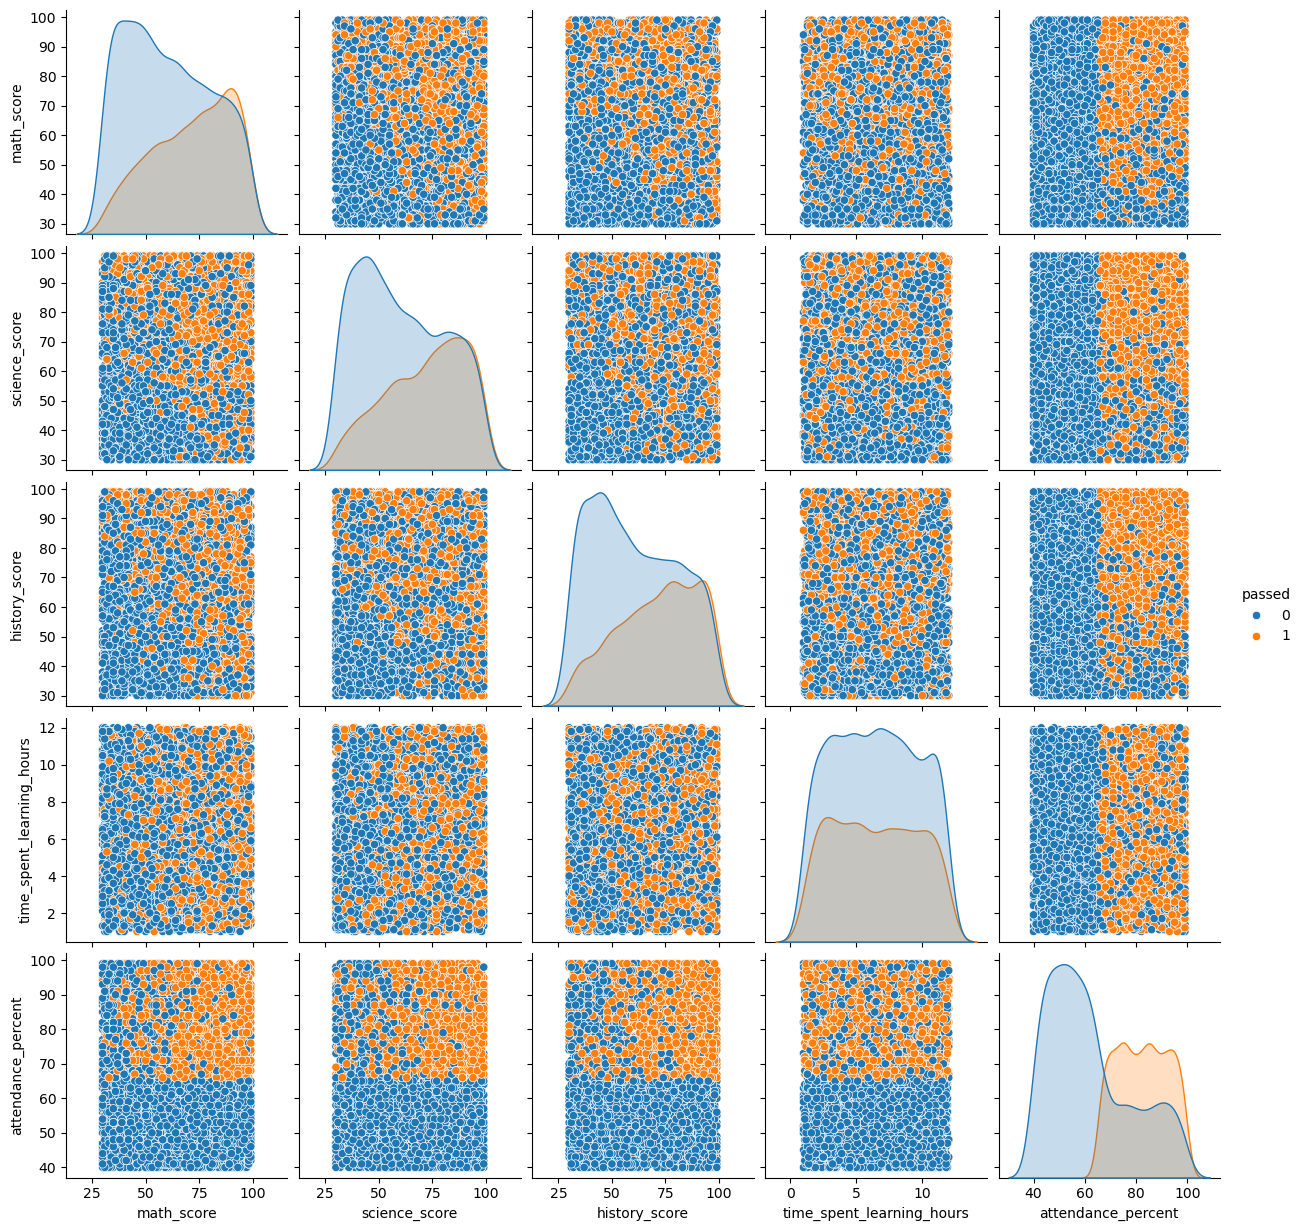

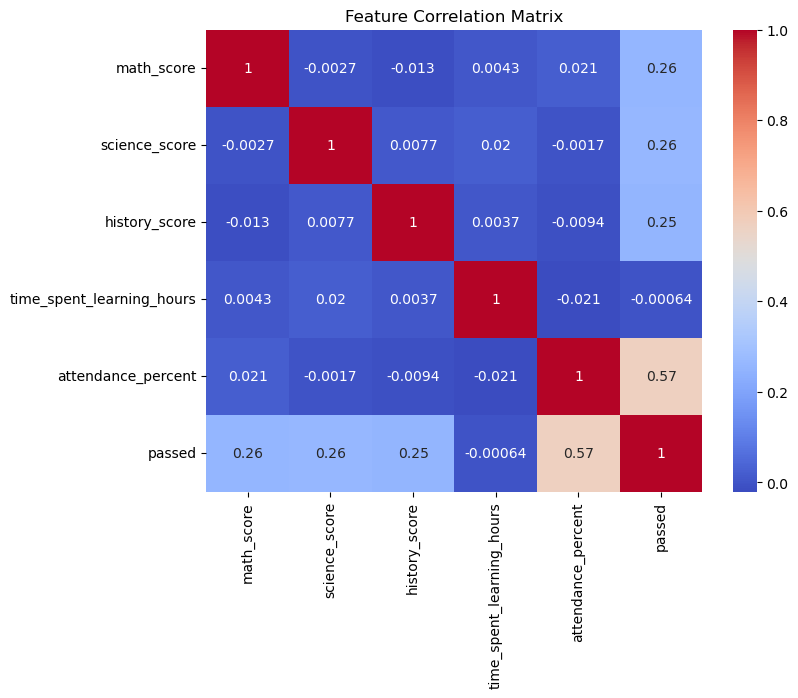

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df, hue="passed")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [6]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

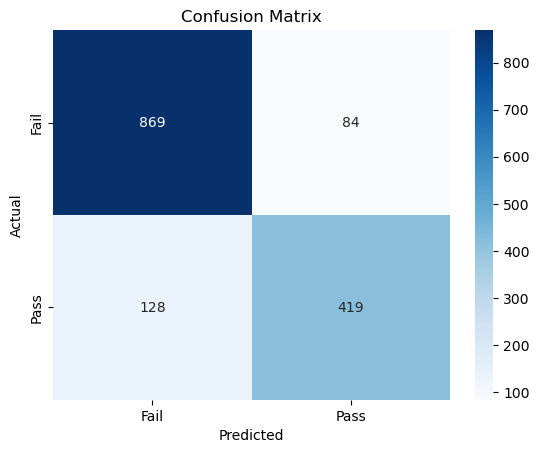

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       953
           1       0.83      0.77      0.80       547

    accuracy                           0.86      1500
   macro avg       0.85      0.84      0.84      1500
weighted avg       0.86      0.86      0.86      1500



In [7]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print(classification_report(y_test, y_pred))


In [8]:
import joblib


joblib.dump(model, "student_performance_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [9]:
import pickle

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)
print(type(scaler))
print(scaler)


<class 'numpy.ndarray'>
['math_score' 'science_score' 'history_score' 'time_spent_learning_hours'
 'attendance_percent']


In [10]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # or your model


data = {
    "math_score": [70, 80, 90, 60, 85],
    "science_score": [80, 85, 70, 60, 75],
    "history_score": [75, 65, 85, 70, 80],
    "attendance_percent": [90, 80, 70, 95, 85],
    "time_spent_learning_hours": [10, 15, 20, 5, 18]
}


import pandas as pd
df = pd.DataFrame(data)


X = df
y = [1, 1, 0, 1, 0]  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model = RandomForestClassifier()
model.fit(X_scaled, y)


with open("student_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [12]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

def predict_student_performance():
    print("\n🎓 Enter Student Academic Details:\n")

    
    try:
        math_score = float(input("Enter Math Score (0-100): "))
        science_score = float(input("Enter Science Score (0-100): "))
        history_score = float(input("Enter History Score (0-100): "))
        attendance_percent = float(input("Enter Attendance Percentage (0-100): "))
        time_spent_learning_hours = float(input("Enter Weekly Learning Hours (e.g., 1-40): "))
    except ValueError:
        print("\n⚠️ Invalid input. Please enter numerical values only.")
        return

    
    if not all(0 <= v <= 100 for v in [math_score, science_score, history_score, attendance_percent]):
        print("\n⚠️ Scores and attendance should be between 0 and 100.")
        return
    if not (0 <= time_spent_learning_hours <= 40):  # Added a reasonable range for learning hours
        print("\n⚠️ Weekly learning hours should be between 0 and 40.")
        return

    try:
        
        with open("student_model.pkl", "rb") as model_file:
            model = pickle.load(model_file)
        with open("scaler.pkl", "rb") as scaler_file:
            scaler = pickle.load(scaler_file)  # this should be a StandardScaler object

        
        print(f"Scaler type: {type(scaler)}")

        
        if not isinstance(scaler, StandardScaler):
            print("\n⚠️ The loaded scaler is not of type StandardScaler.")
            return

        
        input_data = pd.DataFrame([{
            "math_score": math_score,
            "science_score": science_score,
            "history_score": history_score,
            "attendance_percent": attendance_percent,
            "time_spent_learning_hours": time_spent_learning_hours
        }])

        required_columns = ["math_score", "science_score", "history_score",
                            "attendance_percent", "time_spent_learning_hours"]
        input_data = input_data[required_columns]

        
        input_scaled = scaler.transform(input_data)

        
        prediction = model.predict(input_scaled)[0]
        result = "❌ Failed" if prediction == 1 else "✅ Passed"
        print(f"\n🎯 Prediction: The student is likely to {result}")

        
        recommendations = []
        if math_score < 60:
            recommendations.append("🔢 Khan Academy: Basic Math")
        if science_score < 60:
            recommendations.append("🧪 Coursera: Introduction to Science")
        if history_score < 60:
            recommendations.append("📜 CrashCourse: History Essentials")
        if time_spent_learning_hours < 4:
            recommendations.append("⏱️ Consider using a Pomodoro Planner to increase study efficiency")

        if recommendations:
            print("\n📘 Suggested Learning Resources:")
            for r in recommendations:
                print("-", r)

    except Exception as e:
        print("\n❌ An unexpected error occurred during prediction.")
        print(f"Details: {e}")


predict_student_performance()



🎓 Enter Student Academic Details:



Enter Math Score (0-100):  40
Enter Science Score (0-100):  40
Enter History Score (0-100):  40
Enter Attendance Percentage (0-100):  60
Enter Weekly Learning Hours (e.g., 1-40):  20


Scaler type: <class 'sklearn.preprocessing._data.StandardScaler'>

🎯 Prediction: The student is likely to ❌ Failed

📘 Suggested Learning Resources:
- 🔢 Khan Academy: Basic Math
- 🧪 Coursera: Introduction to Science
- 📜 CrashCourse: History Essentials
